In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Descriptive statistics
- Descriptive statistics summarizes data into a single value (statistic). 
- Data can be summarised using:
    1. Measures of location: Areas where data values are concentrated.
    2. Measures of variability: How the data values are dispersed. 
    3. Measures of skewness: How histograms of numerical data are shaped.

## Measures of location: Central location
- Central location is a statistic that represents the average value of a data set. 
- There are three types of central-location statistics:
    1. **Mode**
    2. **Median**
    3. **Mean**
    
### Mode
- The **mode** is the most frequenlty occuring value in a data set.
- The value can be numerical or categorical
- If there is one mode, the data set is unimodal
- If there are two modes, the data set is bimodal
- If there are more than two modes, the data set is multimodal

#### Example
The following data are test results from 11 students: 
- **80, 43, 50, 23, 65, 70, 55, 63, 60, 65, 64**


In [124]:
results = np.array([80, 43, 50, 23, 65, 70, 55, 63, 60, 65, 64])

values, counts = np.unique(results, return_counts=True)

data =  [(val, count) for val, count in zip(values, counts)]

max_val = max([i[1] for i in data ])
mode = [val for val in data if val[1] == max_val]
mode_values = [i[0] for i in mode]
print(f'Modes = {mode_values}, with frequency = {mode[0][1]}')

Modes = [65], with frequency = 2


- 65 appears to be the most frequent value with a freqency of 2.
- Because there is one mode, the data set is unimodal 

### Median
- The **median** is middle numerical value of an ordered data set.
- If the number of observations is odd the median lies in the ${\frac{n+1}{2}}^{th}$  position
    - n is the total number of observations in the data set
- If the number of observations is odd the median lies in the ${\frac{n}{2}}^{th}$   position
    - n is the total number of observations in the data set

In [3]:
print(f'The ordered test results are: {np.sort(results)}') 
print(f'Median of the results is: {np.median(results)}')

The ordered test results are: [23 43 50 55 60 63 64 65 65 70 80]
Median of the results is: 63.0


- 50% of the results are below 63 
- 100% - 50% = 50% of the results are above 63

### Mean
- There are 4 types of mean
    1. Arithmetic mean
    2. Weighted mean
    3. Geometric mean
    4. Harmonic mean

#### Arithmetic mean
- The **arithmetic mean** is sum of all numerical values divided by their total number.
- It is defined by the following formula:
$$
 \bar{x} =  \frac{\sum_{i=1}^{n} x_i}{n} \;\; , \;\; \mu =  \frac{\sum_{i=1}^{N} x_i}{N} \;
$$
- $\mu$ = The population mean parameter
- $\bar{x}$ = The sample mean statistic 
- $n, N$ = The number of observations
- $x_i$ = The $i$<sup>th</sup> data value in the sample
- ${\sum_{i=1}^n = x_1 + x_2 + x_3 + ... + x_n}$ = The sum of the $n$ observations


In [125]:
results_mean =  np.sum(results)/np.size(results) # equivalent to np.mean(results)
print(f'The arithmetic mean of the test results is: {np.sum(results)}/{np.size(results)} = {results_mean}') 

The arithmetic mean of the test results is: 638/11 = 58.0


For the test results, most values values are around 58 
 
#### Weighted mean
- The **weighted mean** is used when numerical values are associated with different weights
    - Weight represents the importance of a value over other values in the dataset.
- The formula for weighted mean is;
$$
wieghted \; \bar{x} =  \frac{\sum_{i=1}^n w_ix_i}{\sum_{i=1}^n w_i} \;\;
$$

$w_ix_i$ = The product of each variable $x_i$ with its weight $w_i$ 

##### Example
A student has the following grades

|Assessment| Weight      | Grade |
|----------| ----------- | -----------|
|Practicals| 5% | 60% |
|Asignments| 10% | 45% |
|Test 1 | 15% | 40% |
|Test 2 | 20% | 65% |
|Exam | 50% | 45% |

What is the the student's final mark ?
 


In [5]:
grades = [69,44,40,64,45]
weights = [5,10,15,20,50]
weighted_grades = [ g*w for g,w in zip(grades, weights)]
final_mark = np.sum(weighted_grades)/np.sum(weights)
print(f'Final mark = {final_mark}%')

Final mark = 49.15%


The student has a final mark of 49%. The student failed. 

#### Geometric mean
- The **geometric mean** is used to find the average rate of change in random variables over time
- The geometric mean is the $n^{th}$ root of $n$ the product of numbers;
$$
GM = \sqrt[n]{\prod_{i=1}^{n} x_i} 
$$
- $\prod_{i=1}^{n} x_i = x_1\cdot x_2\cdot \cdot \cdot x_n$ = The product of $n$ numbers


##### Example
The electricity tariff has increased by 12%, 8% and 16% per annum over a three-year<br>
period. Find the average annual percentage increase in the electricity tariff.


In [6]:
change = [12, 8, 16]
dec_change = [1+i/100 for i in change]

geo_mean = lambda x: pow(np.array(x).prod(), 1/len(x))
perc_change = (geo_mean(dec_change)-1)*100

print(f'Percentage change = {perc_change:.2f}% ')

Percentage change = 11.95% 


Electricity tariffs have increased by an average of 11.95% annually over the past three
years.

#### Harmonic mean
- The harmonic mean is used to calculate the average of ratios
- It is found by dividing the number of data points by the sum of reciprocals of the data points.
$$
HM =  \frac{n}{\sum_{i=1}^{n} \frac{1}{x_i}}
$$

- $n$ = The number of data points

- ${\sum_{i=1}^{n} \frac{1}{x_i}} = \frac{1}{x_1} + \frac{1}{x_2} + ... + \frac{1}{x_n}$

- The harmonic mean is only defined for positive numbers.
- The harmonic mean assigns more weight to smaller values that bigger values

#### Example
The following data are test results from 11 students: 
- **80, 43, 50, 23, 65, 70, 55, 63, 60, 65, 64**

Find the harmonic mean.


In [7]:
hm_func = lambda arr: len(arr) / np.sum(1.0/arr) 
harmonic_mean = hm_func(results)
print(f'Harmonic mean = {harmonic_mean:.2f}')

Harmonic mean = 52.22


### Outliers
- Outliers are extreme values in a data set.
    - If the outlier is extremely small, the mean will be undervalued. 
    - If the outlier is extremely large, the mean will be overvalued.
- Outliers can only distort the mean of a data set.
    - This is because the mean relies on all values of the data set.
    - The median only relies on middle values therefore outliers cannot affect it.
    - The mode only relies on most frequent values which are unlikely to be outliers.
    
- If there are outliers in a data set;
    - The mean can be calculated without the outliers if it represents the central-tendancy.
    - The median can be used to represent the central-tendancy for numerical/categorical datasets.
    - The median/mode can be used to represent the central-tendancy for categorical datasets.

## Measures of location: Percentiles

### Percentiles 
A percentile is a statistic that separetes a data set into two locations:
<ul>
    <li>percentage of data points below the percentile.</li>
    <li>percentage of data points above the percentile.</li>
</ul>

<ul>
    <li>Therfore the $k^{th}$  percentile separates the lower $k$% from the upper $(100 - k)$%</li>
    <li>The 20<sup>th</sup> percentile separates the lower 20% from the upper 80%</li>
</ul>

- A percentile is a relative statistic because it ranks a data point relative to other data points. 
    - If a data point is on the 10th percentile it means 90% of data points are above the data point
    - Because percentiles are relative values, they cannot be distorted by outliers
    
    
- To find the  $k^{th}$  percentile:
    - Sort the data in ascending order
    - $P_k = \frac{k(n + 1)}{100}$
        - $P_k$ = The value at the position $\frac{k(n + 1)}{100}$ of the sorted data set.
        - $n$ = the number of observations.

- For the results of the 11 students, find the $10^{th}$ and $50^{th}$ percentile.

In [8]:
print(f'The 10th percentile = { np.percentile(results,10)}')
print(f'The 50th percentile = { np.percentile(results,50)}')

The 10th percentile = 43.0
The 50th percentile = 63.0


- 10% of the results are below 43 and 90% of the results are above 43.
- 50% of the results are below 63 and 50% of the results are above 63.
    - $50^{th}$ percentile is equivalent to the median of the data set


Percentiles can be used also be used to divide data into:
1. **Quartiles**
2. **Deciles**
    
### Quartiles
Quartiles divide a data set into four equal parts:
1. Lower quartile: Separates the lower 25% from the upper 75%
2. Middle quartlie: Separates the data sets onto equal parts 50/50
3. Upper quartile: Separates the lower 75% from the upper 25%

- Find the lower quartile value of the results.
- Find the upper quartile value of the results.



In [9]:
quartiles = np.percentile(results, q=np.arange(25, 100, 25),interpolation='midpoint')
print(f'The lower quartile = {quartiles[0]}')
print(f'The upper quartile = {quartiles[2]}')

The lower quartile = 52.5
The upper quartile = 65.0


### Deciles
Deciles divide a data set into 10 equal parts
- Each decile has 10 percent of the observations

Below are the deciles of the results from 11 students

In [10]:
deciles = np.percentile(results, q=np.arange(10, 100, 10),interpolation='midpoint')
print(np.sort(results))
print(f'deciles:{deciles}')

[23 43 50 55 60 63 64 65 65 70 80]
deciles:[43. 50. 55. 60. 63. 64. 65. 65. 70.]


## Measures of variability
Variability refers to the extend to which numerical data values are scattered about their central location
- Degree of variablity influences the reliability of the central-location
    - widely dispersed data indicate low confidence in the reliability of central-location statistic
    - narrowly dispersed data indicate high confidence in the reliability of central-location statistic

Statistics used to describe data dispersion are:
- Range
- Variance
- Standard deviation
- Coefficient of variation.

### Range
- Range defines the variability between the maximum and minimum value in a data set
- The difference between the highest and lowest data values in a distribution
- The range is unreliable because it can be distored by outliers

#### Example
The daily electricity consumption in kilowatt hours (kWh) by a sample of 20 households is: <br>
50, 58, 51, 47, 33, 40, 51, 37, 38, 43, 48, 60, 61, 55, 55, 46, 44, 43, 35

find the range

In [75]:
elec_cons = pd.Series([58,51,50,47,33,40,51,37,38,43,43,48,60,61,55,55,46,44,43,35])
elec_range = elec_cons.max()  - elec_cons.min()
print(f"The range is {elec_range}kWh")

The range is 28kWh


### Variance
- A measure of the average squared deviation from the central value.
$$
 s^2 =  \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n - 1} \;\; , \;\; \sigma^2 =  \frac{\sum_{i=1}^{N} (x_i - \mu)^2}{N} \;
$$
- $\sigma^2$ = The population variance
- $s^2$ = The sample variance 
- $n, N$ = The number of observations
- $(x_i - \bar{x})^2\;,\; (x_i - \mu)^2$ = The $i$<sup>th</sup> deviation in the sample/population
- Dividing by $n - 1$ in the sample makes the population estimator unbiased

#### Example
Find the variance in the elecricity consumption of the 20 households

In [12]:
variance =  elec_cons.var()
print(f'The variance of household electricity consumption is {variance:.2f} Kwh\u00b2')

The variance of household electricity consumption is 67.57 Kwh²


### Standard deviation
- The square root of the variance
    - The variance is expressed in square units, making it hard for interpretation
    - The square root removes the square units for easier interpretation
- The standard deviation reflects how tightly the observations cluster around the mean.

$$
 s =  \sqrt{s^2} \;\; , \;\; \sigma = \sqrt{\sigma^2}
$$
- $s$ =  The sample standard deviation
- $\sigma$ =  The population standard deviation

#### Example
Find the standard deviatin in the elecricity consumption of the 20 households

In [55]:
std_dev = elec_cons.std()
print(f'Standard deviation = {std_dev:.2f} kWh.')

Standard deviation = 8.22 kWh.


The standard deviation of household electricity consumption is 8.22 kWh.

### Coefficient of Variation
- The coefficient of variation (CV) is the ratio of the standard deviation to the mean
- CV measures the dispersion data points around the mean
    - The higher the cv, the greater the dispersion
    - The lower the cv, the smaller the dispersion
- CV is always expressed as a percentage
    - This is useful when comparing the variability across different samples

$$
CV = \frac{\sigma}{\mu}*100
$$

Below are the calculations of cv for results of the 11 students and electric consumption 


In [14]:
# results
squared_deviation = (results -  results.mean())**2
variance = squared_deviation.sum()/(results.size -1)
cv_results = np.sqrt(variance)/results.mean()*100
print(f'cv for results: {cv_results: .2f}%')

# elecricity consumption
cv_elec = elec_cons.std()/ elec_cons.mean() * 100
print(f'cv for elecricity consumption: {cv_elec: .2f}%')

cv for results:  26.23%
cv for elecricity consumption:  17.53%


- Both cv's are low, which indicate that the values are closer to the mean
- Elecricity consumption has values closer to the mean than results of 11 students

## Frequency distributions of unimodal data
There are three common shapes of frequency distributions formed by unimodal data
1. Symmetrical Distributions
2. Positively Skewed Distributions
3. Negatively Skewed Distributions

### Symmetrical Distributions
- The histogram of a symmetrical distribution forms a bell shape in which data are distributed symmetrically around their mean
    - 50% of the values are less than the mean
    - 50% of the values are greater than the mean
    
- In a symmetrical distribution, all central-location measures are equal
    - Mean = Median = Mode
    
- Data in a symmetrical distribution appear more frequenlty near the central-location measures

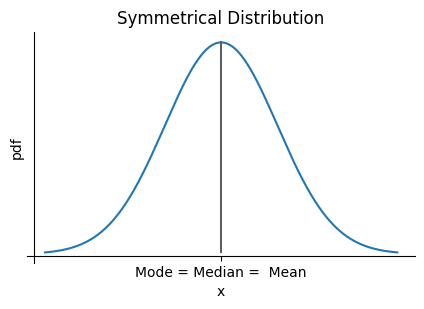

In [15]:
mean = 6; std = 1.6;
points = 0.001
x = np.arange(1,11,points)

f = lambda x, mu,sigma: np.exp(-0.5*np.square((x-mu)/sigma))/(sigma*np.sqrt(2*np.pi))

plt.figure(figsize=(5,3))
plt.title("Symmetrical Distribution")
plt.xlabel('x'),plt.ylabel('pdf')

ax = plt.subplot(111)
ax.set_yticks([])
ax.set_xticks([6]),ax.set_xticklabels(['Mode = Median =  Mean'])
for i in ['top','right']: 
    ax.spines[i].set_visible(False)
ax.spines['left'].set_position(('data', 0.7))
ax.spines['bottom'].set_position(('data', -0.002))

ax.plot(x,f(x,mean, std))
_ = ax.plot([6,6],[min(f(x,mean, std)), max(f(x,mean, std))],color="#5f5f5f")


#### Normal distribution    
- A symmetrical distribution is also called a normal distrubution
- Mathematically, the normal distribution is defined as a probability density function 
    - probability density function: Describes the probability of different possible values of a continous variable 
- The general form of its probability density function is:
$$
    f(x) = \frac{e^{-0.5(\frac{x - \mu}{\sigma})^2}}{\sigma\sqrt{2\pi}}
$$
- $\frac{x - \mu}{\sigma}$ = Standard Score (z-score)
    - Converting x to a standard score is called standardizing
    - Standardizing converts a normal distribution to a standard normal distribution
    - In a standard normal distribution, mean = 0 and standard deviation = 1
    
- The area under the curve of a probability density function between 2 points gives the probabilty of values<br>
  within the range of the two values

##### The Empirical rule
In a normal distribution,
- 68% of the data are within 1 standard deviation of the mean
- 95% of the data are within 2 standard deviation of the mean
- 99.7% of the data are within 3 standard deviation of the mean

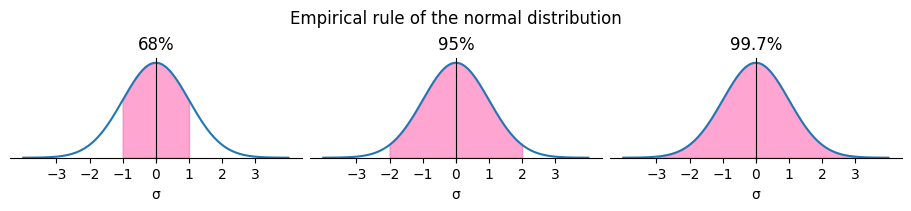

In [16]:
mean = 0; std = 1;
points = 0.001
x = np.arange(-4,4,points)
f = lambda x: np.exp(-0.5*np.square((x-mean)/std))/(std*np.sqrt(2*np.pi))

fig, axes = plt.subplots(1, 3, figsize=(9, 2),constrained_layout=True)

def center_yaxis(ax,arr):
    ax.spines['left'].set_position('center')
    for i in ['top','right']: ax.spines[i].set_visible(False)
    ax.spines['bottom'].set_position('zero')

for i,v in enumerate(['68%', '95%', '99.7%']):
    axes[i].set_title(v)
    axes[i].plot(x,f(x))
    axes[i].set_xticks(np.linspace(-3,3,7))
    axes[i].set_yticks([])
    axes[i].set_xlabel('\u03C3')
    section = np.arange(-1*(i+1),1*(i+1),points)
    
    axes[i].fill_between(section,f(section),alpha=0.6,color='hotpink')

    center_yaxis(axes[i],['left'])

_ = fig.suptitle('Empirical rule of the normal distribution')

### Positively Skewed Distributions
- Outliers cause distributions to be positively skewed
- Most values of a positively skewed distribution a concentrated to the left
- In a positively skewed distribution,
    - Mean  >  Median  >  Mode

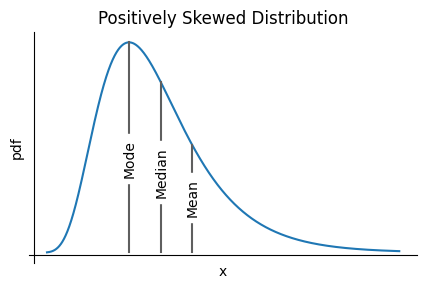

In [45]:
mean = 0; std = 0.4;
points = 0.001
x = np.arange(0.2,3,points)

f = lambda x, mu,sigma: np.exp(-0.5*np.square((np.log(x)-mu)/sigma))/(x*sigma*np.sqrt(2*np.pi))

maxval = max([i for i in zip(x,f(x,mean,std))],key=lambda x: x[1])

plt.figure(figsize=(5,3))
plt.title("Positively Skewed Distribution")
plt.ylabel("pdf"), plt.xlabel("x")
ax = plt.subplot(111)
ax.set_yticks([]), ax.set_xticks([])
for i in ['top','right']: 
    ax.spines[i].set_visible(False)

ax.plot(x,f(x,mean,std))

ax.spines['left'].set_position(('data', 0.1))
ax.spines['bottom'].set_position(('data', -0.01))

x1, x2, x3 = maxval[0], maxval[0] +0.25, maxval[0] + 0.5
ymin, y1,y2, y3 = min(f(x,mean, std)),f(x1,mean, std),f(x2,mean, std), f(x3,mean, std)
for i,j in zip([x1,x2,x3],[y1,y2,y3]):
    plt.plot([i,i],[ymin, j],color="#5f5f5f")

plt.text(x1-0.05, 0.4, "Mode",rotation=90,backgroundcolor='#fff')
plt.text(x2-0.05, 0.3, "Median",rotation=90,backgroundcolor='#fff')
_ = plt.text(x3-0.05, 0.2, "Mean",rotation=90,backgroundcolor='#fff')

#### Lognormal distribution
- A positively skewed distribution has a shape of a lognormal distribution
- It is called log-normal because the natural logarithm of the random variable $x$ is normally distributed.
    - $ln(x)$ follows a normal distribution

- It can be used to model growth rates and income distributions
- The general form of its probability density function is:
$$
    f(x) = \frac{e^{-0.5(\frac{ln(x) - \mu}{\sigma})^2}}{x\sigma\sqrt{2\pi}}
$$
- $x > 0$
- $\mu $ = location parameter
    - $\mu $ = mean when data is transformed to $ln(x)$  
- $\sigma$ = scale parameter
    - $\sigma $ = standard deviation when data is transformed to $ln(x)$  

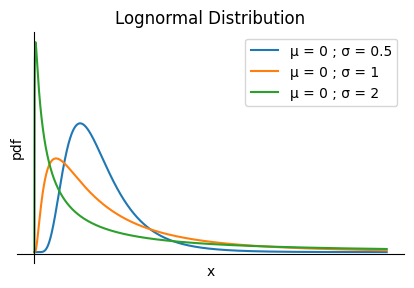

In [25]:
points = 0.001
x = np.arange(0.000001,6,points)

f = lambda x, mu,sigma: np.exp(-0.5*np.square((np.log(x)-mu)/sigma))/(x*sigma*np.sqrt(2*np.pi))


plt.figure(figsize=(5,3))
plt.title("Lognormal Distribution")
plt.ylabel("pdf"), plt.xlabel("x")
ax = plt.subplot(111)
ax.set_yticks([]), ax.set_xticks([])
for i in ['top','right']: 
    ax.spines[i].set_visible(False)
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', -0.01))

mean = 0
ax.plot(x,f(x,mean,0.5),label = '\u03BC = 0 ; \u03C3 = 0.5')
ax.plot(x,f(x,mean,1), label = '\u03BC = 0 ; \u03C3 = 1')
ax.plot(x,f(x,mean,2), label = '\u03BC = 0 ; \u03C3 = 2')
_ = plt.legend()

### Negatively Skewed Distributions
- Outliers cause distributions to be negatively skewed
- Most values of a negatively skewed distribution a concentrated to the right
- It has a shape of a negative lognormal distribution.
- In a negatively skewed distribution,
    - Mode  >  Median  >  Mean

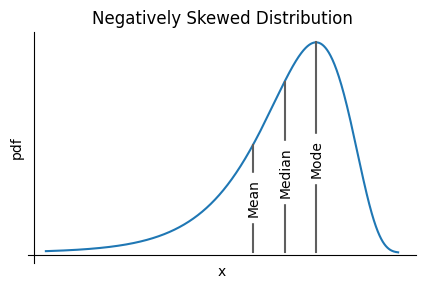

In [44]:
mean,std, points = 0, 0.4, 0.001
x = np.arange(0.2,3,points)
f = lambda x, mu,sigma: np.exp(-0.5*np.square((np.log(x)-mu)/sigma))/(x*sigma*np.sqrt(2*np.pi))
maxval = max([i for i in zip(x,f(x,mean,std))],key=lambda x: x[1])

plt.figure(figsize=(5,3))
plt.title("Negatively Skewed Distribution")
plt.ylabel("pdf"), plt.xlabel("x")
ax = plt.subplot(111)
ax.set_yticks([]), ax.set_xticks([])
for i in ['top','right']: 
    ax.spines[i].set_visible(False)
ax.spines['left'].set_position(('data', -3.09))
ax.spines['bottom'].set_position(('data', -0.01))
    
ax.plot(-x,f(x,mean,std))

x1, x2, x3 = maxval[0], maxval[0] +0.25, maxval[0] + 0.5
ymin, y1,y2, y3 = min(f(x,mean, std)),f(x1,mean, std),f(x2,mean, std), f(x3,mean, std)
for i,j in zip([x1,x2,x3],[y1,y2,y3]):
    plt.plot([-i,-i],[ymin, j],color="#5f5f5f")

plt.text(-x1-0.05, 0.4, "Mode",rotation=90,backgroundcolor='#fff')
plt.text(-x2-0.05, 0.3, "Median",rotation=90,backgroundcolor='#fff')
_ = plt.text(-x3-0.05, 0.2, "Mean",rotation=90,backgroundcolor='#fff')

### Measures of skewness
There are three common ways of measuring skewness
1. Using the mode
2. Using the median
3. Using Pearson’s Coefficient of Skewness

Skewness is interpreted as follows:
- $Skewness = 0$ : The distribution is symmetrical
- $Skewness > 0$ : The distribution is positively skewed
- $Skewness < 0$ : The distrribution is negatively skewed

#### Mode
$$
Skewness = \frac{mean\: – \:mode}{standard \: deviation}
$$


#### Example
The daily electricity consumption in kilowatt hours (kWh) by a sample of 20 households is: <br>
50, 58, 51, 47, 33, 40, 51, 37, 38, 43, 48, 60, 61, 55, 55, 46, 44, 43, 35


In [112]:
elec_cons = pd.Series([58,51,50,47,33,40,51,37,38,43,43,48,60,61,55,55,46,44,43,35])
mode_skewness = (elec_cons.mean() - elec_cons.mode())/ elec_cons.std()
mode_skewness

0    0.474452
dtype: float64

#### Median
$$
Skewness = \frac{3(mean \: – \: median)}{standard \: deviation} 
$$

In [94]:
median_skewness = 3*(elec_cons.mean() - elec_cons.median())/ elec_cons.std()
median_skewness

0.14598537871715012

#### Pearson’s coefficient of skewness
$$
Sk_p =  \frac{\sum_{i=1}^{n} (x_i - \bar{x})^3}{(n - 1)(n-2)s^3}
$$
- $Sk_p$ = Pearson’s Coefficient of Skewness
- $s$ = standard deviation

In [120]:
cubed_deviation = (elec_cons -  elec_cons.mean())**3
den = (elec_cons.size -1)*(elec_cons.size -2)*(elec_cons.std()**3)
Skp = elec_cons.size*cubed_deviation.sum()/den
mean, median, mode = elec_cons.mean(), elec_cons.median(), elec_cons.mode().values[0]
print(f'''Skp: {Skp:.2f}
Mean: {mean}
Median: {median}
Mode: {mode}
Mean > Median > Mode: {mean> median and median> mode}
''')

Skp: 0.11
Mean: 46.9
Median: 46.5
Mode: 43
Mean > Median > Mode: True



- All measures are positive, suggesting that the distribution is positivley skewed
- Mean > Median > Mode also suggests that the distribution is positivley skewed

Below is the distribution of elecricity consumption which shows a slight positive skewness


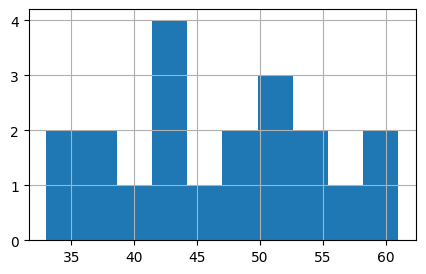

In [113]:
_ = elec_cons.hist(figsize=(5,3))

### Box Plot
- A numeric random variable can also be summarised in a five-number summary table

||||
|--| --| --|
|1| Minimum data value | X<sub>min</sub> |
|2| Lower Quartile | Q<sub>1</sub> |
|3| Median |Q<sub>2</sub> |
|4| Upper Quartile |Q<sub>3</sub> |
|5| Maximum data value | X<sub>max</sub> |

- The graphical representation of the five-number summary table is called a **box plot**

- The **box plot** graphically shows:
    - The range of the data between the minimum value and maximum value
    - The spread of the data between the quartiles
    - The skewness of the data's frequency distribution


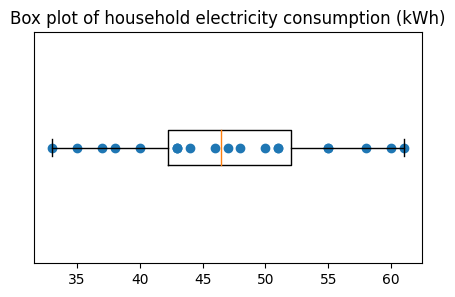

In [122]:
plt.figure(figsize=(5,3))
plt.title("Box plot of household electricity consumption (kWh)")

plt.boxplot(elec_cons.values,vert =False)
plt.yticks([])
_ = plt.scatter(elec_cons.values, np.ones(elec_cons.size))

- The box of the boxplot shows the interquartile range (IQR)
    - IQR = Upper Quartile - Lower Quartile
- The line in the middle of the line is the position of the median
- The endlines are called **whiskers**
    - **Whiskers** indicate variability outside the upper and lower quartiles.
    -  The left whisker = Q<sub>1</sub> - 1.5\*IQR
    -  The right whisker = Q<sub>2</sub> + 1.5\*IQR
    - Data values that fall beyond whiskers are **outliers**

## References

Keller, G. 2017. *Statistics for Management and Economics 11<sup>th</sup>ed.* Boston, USA:Cengage Learning. 

Pavlovic M. 2022.*Log-normal Distribution - A simple explanation.* https://towardsdatascience.com/log-normal-distribution-a-simple-explanation-7605864fb67c (2022, February 16)

Wegner, T. 2013. *Applied Business Statistics: Methods and Excel-based Applications 3<sup>rd</sup>ed.* Claremont, SA:Juta and Company Ltd.

Wheelan, C. 2013. *Naked Statistics: Stripping The Dread From The Data.* New York, USA:W. W. Norton & Company Ltd.

Wikipedia. 2022 *Box Plot* https://en.wikipedia.org/wiki/Box_plot (26, October 2022)

Wikipedia. 2022 *Geometric Mean* https://en.wikipedia.org/wiki/Geometric_mean (2022, November 19)
